In [7]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [8]:
python3 --version
pip3 --version
virtualenv --version


NameError: name 'python3' is not defined

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%202%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [18]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [16]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


NameError: name 'tf' is not defined

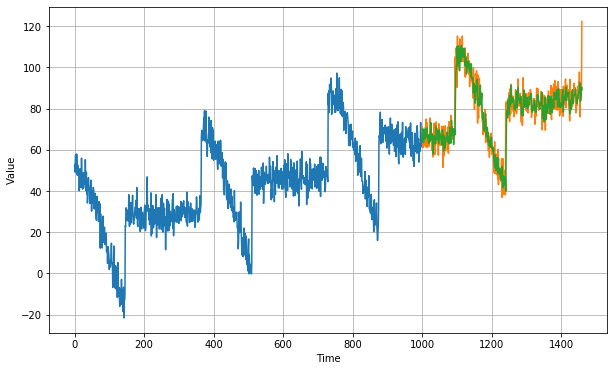

In [5]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [6]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.0860004

In [73]:
#tablacomb=pd.concat([tabla,tabla2], axis=0)
#tablacomb=tablacomb.reset_index(drop=True)
#pd.set_option('display.max_rows', 8000)
#Descomprimir archivos formato .gz
import os
import gzip
import shutil
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set()
from matplotlib import pyplot as plt
import datetime
import time


data_file='/home/gfajardo/Desktop/Datos 121001/PSNfdiciembre2016.csv'
column_names=['Lat','Long','Alt','Dia','Seg']
Mli = pd.read_csv(data_file)#names=column_names)#, header=True)
Mli = Mli.drop(Mli.columns[[0]], axis=1)


Doy=361
Mli_filter = Mli[Mli['Dia'] > Doy]
#Mli_filter =Mli_filter.sort_values(by=['Seg'], ascending=True)#Ordenar en función al tiempo en segundos#print(Mlif)

#Mli_filter2 = Mli_filter[Mli_filter['Alt']>3000]
#Mli_filter=Mli_filter2
print(Mli_filter.describe())
print(Mli_filter.dtypes)
print(Mli_filter.Lat.values.size)
print(Mli)
print(Mli_filter)

                 Lat           Long            Alt            Dia  \
count  251941.000000  251941.000000  251941.000000  251941.000000   
mean      -12.042413     -75.321411    3325.239266     362.971188   
std         0.000005       0.000006       2.211456       0.810083   
min       -12.042430     -75.321427    3317.631000     362.000000   
25%       -12.042416     -75.321415    3323.697000     362.000000   
50%       -12.042412     -75.321411    3325.235000     363.000000   
75%       -12.042409     -75.321407    3326.565000     364.000000   
max       -12.042398     -75.321378    3332.140000     364.000000   

                 Seg  
count  251941.000000  
mean    42059.390591  
std     24361.127664  
min         0.000000  
25%     20995.000000  
50%     41990.000000  
75%     62985.000000  
max     86399.000000  
Lat     float64
Long    float64
Alt     float64
Dia       int64
Seg       int64
dtype: object
251941
               Lat       Long       Alt  Dia    Seg
0       -12.042409

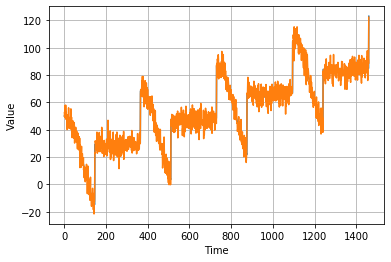

In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time,series)
# Update with noise
series += noise(time, noise_level, seed=42)
plot_series(time,series)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

1259705
251941
251941
251941
251941
251941
251941
10810
              Lat       Long       Alt  Dia    Seg
100848 -12.042419 -75.321402  3323.062  362      0
100849 -12.042419 -75.321402  3323.092  362      1
100850 -12.042419 -75.321402  3323.144  362      2
100851 -12.042418 -75.321402  3323.103  362      3
100852 -12.042418 -75.321402  3323.122  362      4
100853 -12.042418 -75.321402  3323.162  362      5
100854 -12.042419 -75.321404  3323.345  362      6
100855 -12.042418 -75.321404  3323.348  362      7
100856 -12.042418 -75.321404  3323.303  362      8
100857 -12.042418 -75.321404  3323.304  362      9
100858 -12.042418 -75.321404  3323.285  362     10
100859 -12.042418 -75.321404  3323.322  362     11
100860 -12.042418 -75.321404  3323.344  362     12
100861 -12.042418 -75.321404  3323.315  362     13
100862 -12.042418 -75.321404  3323.325  362     14
100863 -12.042418 -75.321404  3323.327  362     15
100864 -12.042418 -75.321404  3323.315  362     16
100865 -12.042418 -75.3214

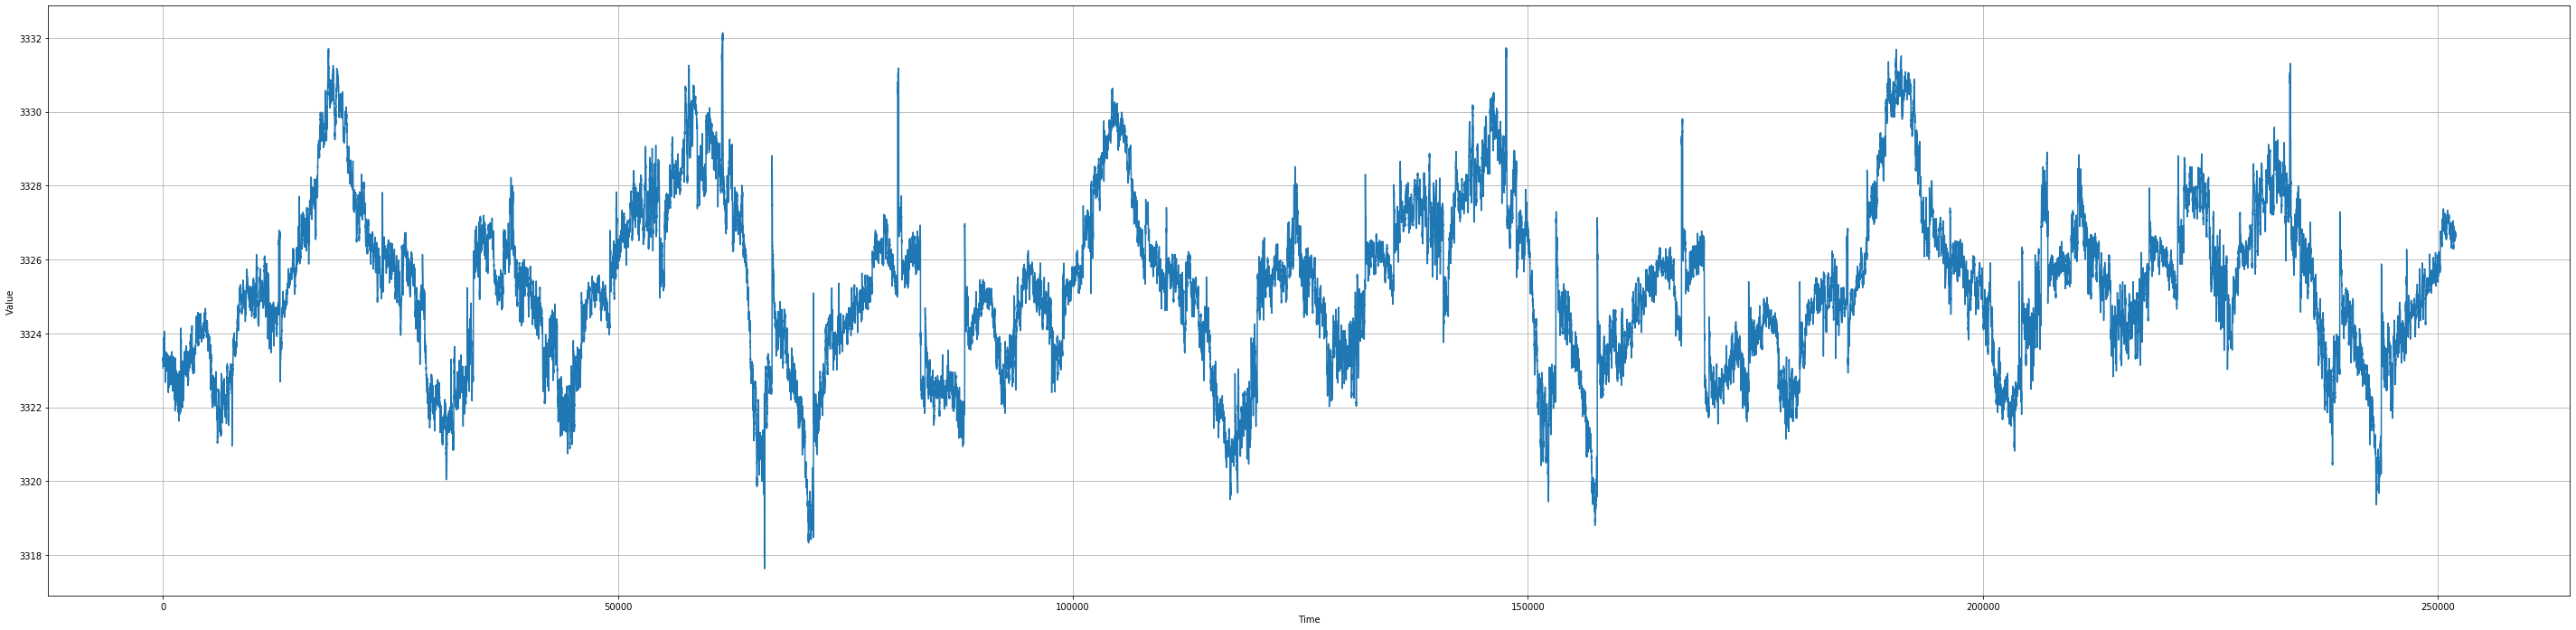

In [82]:
Mli_filter = Mli_filter[Mli_filter['Alt'] > 100] 
#time=Mli_filter.Seg.values
time=Mli_filter.index
Mli_filter_time = Mli_filter.sort_values(['Dia', 'Seg'], ascending = (True, True))
print(Mli_filter.size)#valuesxcolumnas
print(Mli_filter.Alt.values.size)
print(Mli_filter.Alt.size)
print(Mli_filter.Seg.values.size)
print(Mli_filter.Seg.size)
print(Mli_filter.Dia.values.size)
print(Mli_filter.Dia.size)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also 
print(time[10])
print(Mli_filter_time)
time=Mli_filter_time.Seg
time = np.arange(Mli_filter_time.Seg.values.size, dtype="float32")
#print(Mli_filter.shape())
series=Mli_filter_time.Alt
series.size
plt.figure(figsize=(50, 12))
plot_series(time,series)

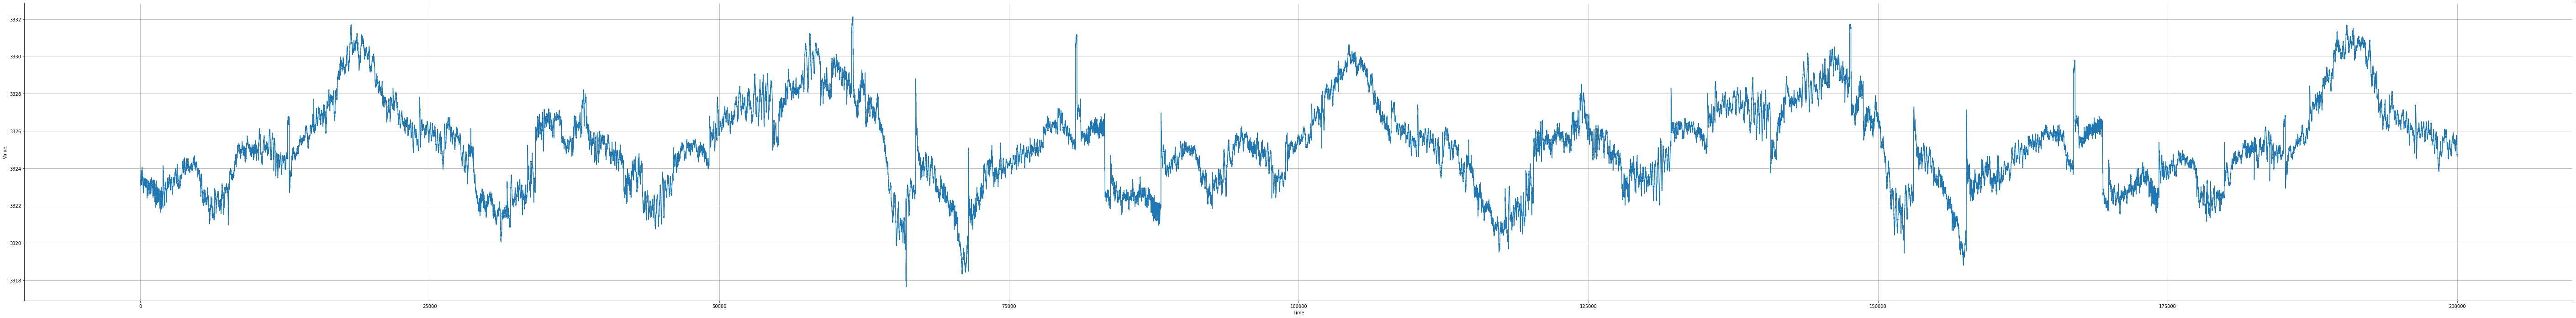

In [88]:
split_time = 200000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(100, 12))
plot_series(time_train, x_train)

window_size = 40
batch_size = 32
shuffle_buffer_size = 200000

In [89]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [90]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-9, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))



<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[ 0.15911002],
       [ 0.08548222],
       [-0.23828211],
       [-0.04372029],
       [ 0.19229418],
       [ 0.3450838 ],
       [-0.07995436],
       [ 0.30369958],
       [ 0.014448  ],
       [-0.2420104 ],
       [-0.12341174],
       [ 0.00759045],
       [ 0.24670702],
       [ 0.30789542],
       [-0.01404113],
       [ 0.40078694],
       [-0.31128478],
       [-0.0882938 ],
       [-0.02434976],
       [ 0.34006938],
       [ 0.06915494],
       [-0.24944651],
       [ 0.16626449],
       [ 0.18938817],
       [-0.06580276],
       [-0.24627823],
       [ 0.13655053],
       [-0.15622799],
       [ 0.35001293],
       [-0.20560695],
       [-0.29857767],
       [-0.11230608],
       [-0.05667251],
       [-0.23061454],
       [-0.07650173],
       [-0.08806134],
       [-0.15152888],
       [ 0.09897038],
       [ 0.3265633 ],
       [ 0.36293894]], dtype=float32), array

251901


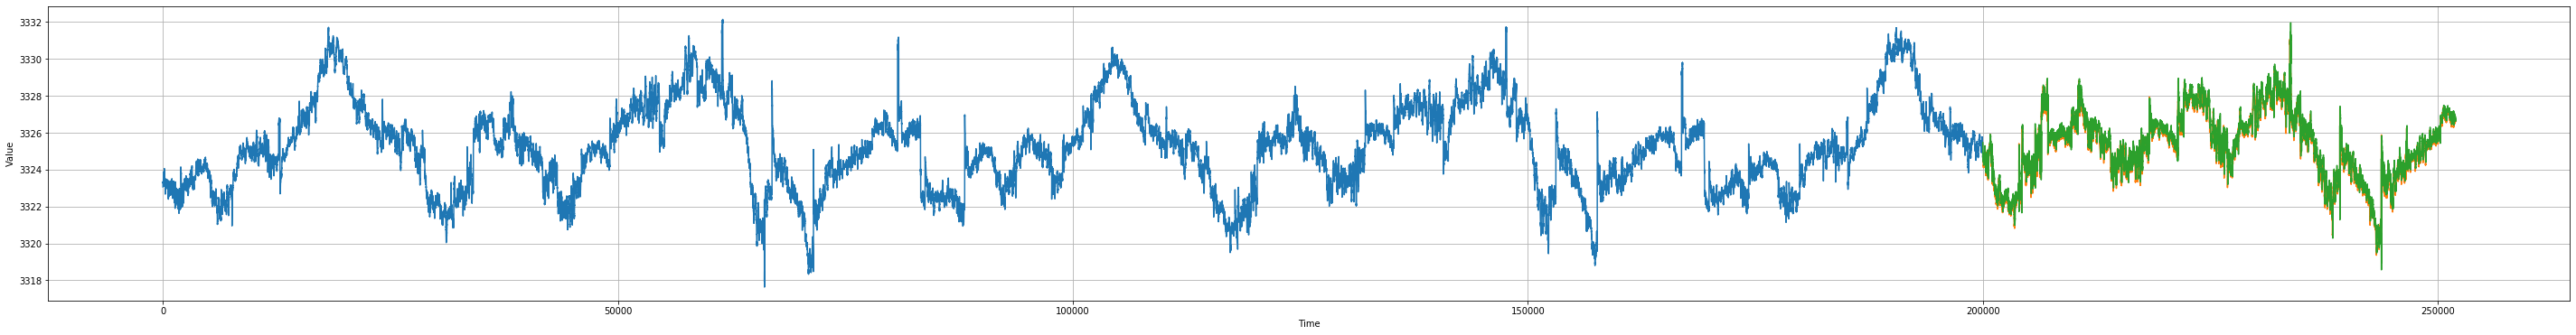

In [91]:
forecast = []
print(len(series) - window_size)

#forecast.append(model.predict(series[0:30][np.newaxis]))
#que=series[0:30].values[np.newaxis]
#print(que)
#que=model.predict(series[0:30][np.newaxis])
    
for a in range(len(series) - window_size):
 #   print(a)

    forecast.append(model.predict(series[a:a+ window_size].values[np.newaxis]))
    
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(50, 6))
plot_series(time_train, x_train)

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [92]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

0.3646995